#**SPRINT 1**

 ### **DATA PREPROCESSING**

In [33]:
pwd

'/home/wsuser/work'

In [34]:
!pip install keras
!pip install tensorflow
!pip install matplotlib


In [35]:
!pip install numpy

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.models import load_model

hi


## **Loading the Data**

In [37]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# **Analyzing the data**

In [38]:
X_train[103]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

7


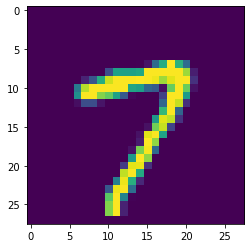

In [14]:
print(Y_train[103])
plt.imshow(X_train[103])

In [39]:
X_train[101]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

1


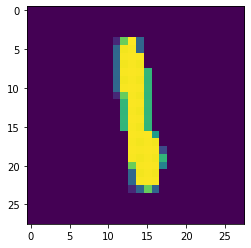

In [40]:
print(Y_train[200])
plt.imshow(X_train[200])

## **Reshaping the data**

In [41]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')
X_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

### **Applying One Hot Encoding**

In [43]:
from keras.utils import np_utils
num_classes=10
Y_train=np_utils.to_categorical(Y_train,num_classes)
Y_test=np_utils.to_categorical(Y_test,num_classes)

# **Model Building**

### **Add CNN Layers**

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()
model.add(Convolution2D(64, (3,3), input_shape=(28,28,1),activation='relu'))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

### **Compiling the model**

In [46]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

####Training the model

In [47]:
model_save=model.fit(X_train,Y_train,batch_size=32,epochs=5,validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 174s 93ms/step - loss: 0.1905 - accuracy: 0.9564 - val_loss: 0.0950 - val_accuracy: 0.9709
Epoch 2/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0847 - val_accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.0832 - val_accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0356 - accuracy: 0.9895 - val_loss: 0.1051 - val_accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0323 - accuracy: 0.9912 - val_loss: 0.1407 - val_accuracy: 0.9739


In [48]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.14070099592208862, 0.9739000201225281]


In [49]:
prediction=model.predict(X_test[:4])
print(prediction)

print(np.argmax(prediction,axis=1))
print(Y_test[:4])

[[2.7432130e-20 4.9167717e-21 2.1955534e-15 8.5358574e-11 1.8159745e-23
  3.2996717e-26 3.8669027e-25 1.0000000e+00 6.1218322e-18 7.5147810e-16]
 [4.9045676e-17 8.2961117e-16 1.0000000e+00 2.1993759e-15 8.0433015e-21
  3.8958065e-24 4.3403076e-11 4.8004704e-23 4.6925968e-15 3.3989617e-20]
 [1.7488077e-07 9.9999499e-01 2.2243807e-09 3.5117105e-13 1.7949320e-08
  2.0249806e-10 4.7749368e-06 1.8611290e-09 2.7893078e-08 1.9678269e-12]
 [9.9999988e-01 5.9920165e-15 4.2502633e-12 1.4402079e-16 1.7881071e-15
  1.3735138e-13 1.7301390e-07 7.5033719e-18 2.5977970e-12 1.0698972e-10]]
[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [50]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.14070099592208862, 0.9739000201225281]


In [51]:
prediction=model.predict(X_test[:4])
print(prediction)
print(np.argmax(prediction,axis=1))
print(Y_test[:4])

[[2.7432130e-20 4.9167717e-21 2.1955534e-15 8.5358574e-11 1.8159745e-23
  3.2996717e-26 3.8669027e-25 1.0000000e+00 6.1218322e-18 7.5147810e-16]
 [4.9045676e-17 8.2961117e-16 1.0000000e+00 2.1993759e-15 8.0433015e-21
  3.8958065e-24 4.3403076e-11 4.8004704e-23 4.6925968e-15 3.3989617e-20]
 [1.7488077e-07 9.9999499e-01 2.2243807e-09 3.5117105e-13 1.7949320e-08
  2.0249806e-10 4.7749368e-06 1.8611290e-09 2.7893078e-08 1.9678269e-12]
 [9.9999988e-01 5.9920165e-15 4.2502633e-12 1.4402079e-16 1.7881071e-15
  1.3735138e-13 1.7301390e-07 7.5033719e-18 2.5977970e-12 1.0698972e-10]]
[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [53]:
model.save("model.h5")

In [54]:
! tar -zcvf model.tgz model.h5

model.h5


In [55]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 13.0 MB/s eta 0:00:01


In [58]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {"url":"https://us-south.ml.cloud.ibm.com",
                   "apikey":"0j_SqD_B1yCNZyVWxmRBcDVXrnEocKvcNNFuO-ZJlYPL"}
client = APIClient(wml_credentials)

In [59]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [60]:
space_uid = guid_from_space_name(client,'digitrecognition')
print("Space UID = "+ space_uid)

Space UID = 841bd899-c7e3-445c-9015-de92ddbb61e7


In [61]:
client.set.default_space(space_uid)

'SUCCESS'

In [62]:
client.software_specifications.list(limit=150)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [63]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [64]:
model_details = client.repository.store_model(model="model.tgz",meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                              )

In [65]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T07:17:16.365Z',
  'id': 'f0116ed6-12e0-4c57-8493-8afe6efeb079',
  'modified_at': '2022-11-18T07:17:19.151Z',
  'name': 'CNN',
  'owner': 'IBMid-666002LO9F',
  'resource_key': '5f65949c-4de1-485a-8d78-5ef0b4c475cd',
  'space_id': '841bd899-c7e3-445c-9015-de92ddbb61e7'},
 'system': {'warnings': []}}

In [74]:
model_id = client.repository.get_model_id(model_details)
model_id

'f0116ed6-12e0-4c57-8493-8afe6efeb079'

In [75]:
client.repository.download(model_id,'model.tar.gz')

File with name: 'model.tar.gz' already exists.


WMLClientError: File with name: 'model.tar.gz' already exists.

In [76]:
ls

model.h5  model.tar.gz  model.tgz


In [78]:
from tensorflow.keras.models import load_model
from PIL import Image

In [79]:
model = load_model('model.h5')

In [81]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='K8bR0mRzSMZw7xEGpLNDargfvgFjTC-onrkxiWT5fbAP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognition-donotdelete-pr-6kufggzi6yx1dt'
object_key = '7.jpg'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']



# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [82]:

img = Image.open(streaming_body_3).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [83]:
img

In [84]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1)

In [85]:
pred = model.predict(im2arr)
print(pred)

[[2.0475562e-17 3.1749671e-13 6.4609829e-08 3.8410974e-08 2.1131146e-19
  5.3135599e-21 2.7256558e-21 9.9999988e-01 9.1358930e-16 3.5906616e-13]]


In [86]:
print(np.argmax(pred, axis=1))

[7]
